## Name: Aditi Verma       |     Roll No: 213010101    | MTech 1st Year   | Predictive Analysis 

### Importing all the necessary modules

In [129]:
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
import seaborn as sns
import keras

In [130]:
#importing data
df = pd.read_csv(r"C:\Users\aditi\Downloads\flipkart_com-ecommerce_sample.csv")

### Exploring data to understand and analyse the contents

In [131]:
df.shape

(20002, 15)

In [132]:
df.describe

<bound method NDFrame.describe of                                 uniq_id            crawl_timestamp  \
0      c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1      7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2      f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3      0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4      bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   
...                                 ...                        ...   
19997  93e9d343837400ce0d7980874ece471c  2015-12-01 10:15:43 +0000   
19998  669e79b8fa5d9ae020841c0c97d5e935  2015-12-01 10:15:43 +0000   
19999  cb4fa87a874f715fff567f7b7b3be79c  2015-12-01 10:15:43 +0000   
20000                               NaN                        NaN   
20001                               NaN                        NaN   

                                             product_url  \
0      http://www.flipkart.com/alisha-solid-women-s-c...   
1    

In [133]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [135]:
df.isnull().sum()

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [136]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

#### Rough Analysis
By glance, To predict the "Primary Category" of the given product we need "product_category_tree", "brand","product_name" columns for our model. Talking about "product_category_tree" we do have to clean it up and create another table called "primary_category" where the tree is cleaned and the correct category is extracted. "brand" coloumn have 5866 null values, which we need to take care of.

### Data Cleaning

In [137]:
#making a copy of originl data
flipkart_data = df.copy()

In [138]:
flipkart_data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [139]:
flipkart_data.drop(flipkart_data.columns[[0,1,2,5,6,7,8,9,11,12,14]], axis=1, inplace=True)

#Lets View the data Now
flipkart_data

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...,...,...
19997,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19999,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
20000,NaN,NaN,NaN,NaN


In [140]:
flipkart_data.head(2)

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor


#### Cleaning the product_category_tree column.

In [141]:
# A function to Clean the product_category_tree and return Primary_Category
def clean_prod_category():
    primary_category=[]
    #iterate in col
    for ele in flipkart_data['product_category_tree']:
        ele = str(ele)
        ele=ele.replace('"]',"")
        category=ele[2:].split(" >>")
        primary_category.append(category[0])
    #returinig the clean data
    return primary_category

In [142]:
#Calling the function
primary_category=clean_prod_category()

#Verfying the output
primary_category

['Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Pet Supplies',
 'Eternal Gandhi Super Series Crystal Paper Weight...',
 'Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Footwear',
 'Clothing',
 'Pet Supplies',
 'Clothing',
 'Pens & Stationery',
 'Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Furniture',
 'Pet Supplies',
 'Clothing',
 'Clothing',
 'Footwear',
 'Pet Supplies',
 'Clothing',
 'Sports & Fitness',
 'Beauty and Personal Care',
 'Clothing',
 'Clothing',
 'Bengal Blooms Rose Artificial Plant  with Pot (3...',
 'Clothing',
 'Pens & Stationery',
 'Pens & Stationery',
 'Pens & Stationery',
 'Clothing',
 'Pens & Stationery',
 'Clothing',
 'Bags, Wallets & Belts',
 'Clothing',
 'Footwear',
 'Home Decor & Festive Needs',
 'Automotive',
 'Tools & Hardware',
 "Vishudh Printed Women's Straight Kurta",
 "Vishudh Printed Women's Straight Kurta",
 "Vishudh Printed Women's Anarkali Kurta",
 'BuildTrack PIR Wireless Motion Sensor - One Swit...',
 'Skayvon SUMMERSIBLE SINGL

In [143]:
primary_category=pd.DataFrame(primary_category,columns=["Category"])
print("Number of Unique Categories",len(primary_category["Category"].value_counts()))

Number of Unique Categories 266


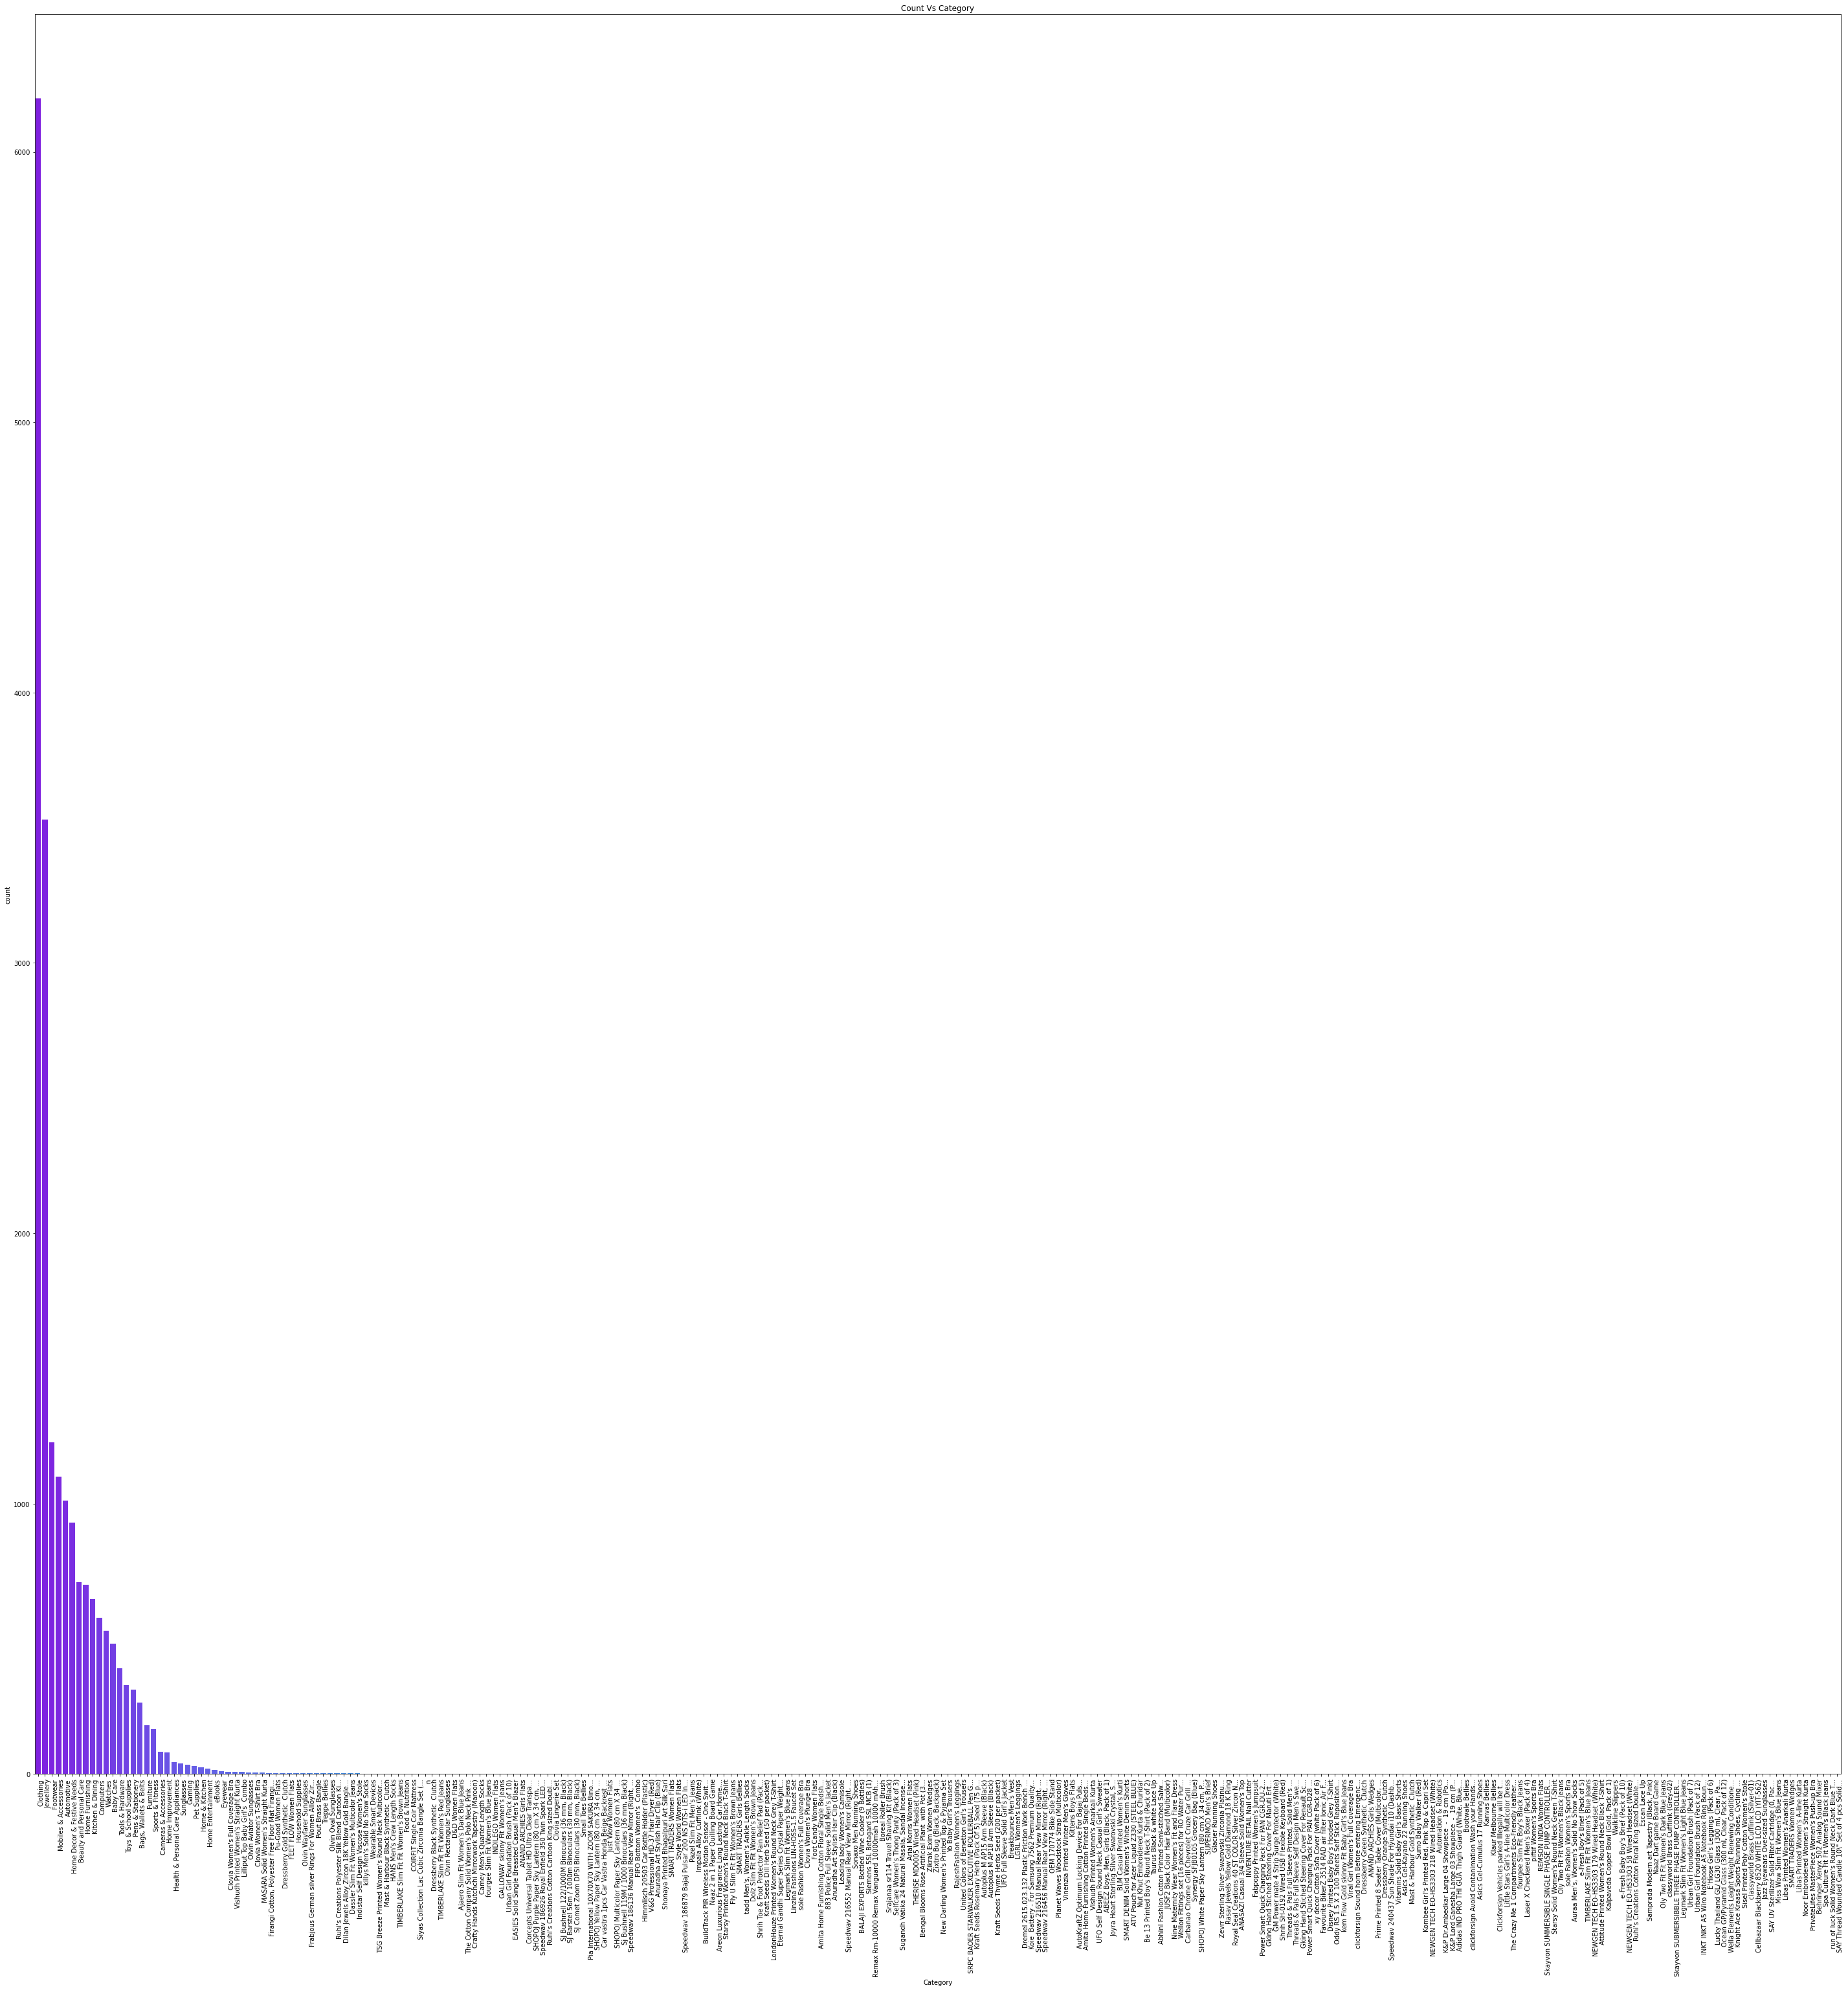

In [144]:
# When we will try to plot the categories and its count , we will get a messy graph as there are 265 categories.

plt.figure(figsize=(50,50))
plt.title("Count Vs Category")
sns.countplot(x="Category",data=primary_category,palette="rainbow",
              order=primary_category["Category"].value_counts().index)
plt.xticks(rotation=90,fontsize = 10, ha='left')
plt.show()

#### Observation-1
We can now look at the plot and observe that there are way too many categories with less then 200 counts and a lot with just 1 and 2. To Better visualize the data, Let's first observe the categories with high count.

In [145]:
# A function which returns a output containg the top categories with more then 'n' counts.
import collections
from collections import Counter

# Here, n stands for the count of categories , and bottom, if you want the categories with most/least count.
# and 'List', do we need a list or dataframe.
def count_of_category(n,bottom=False,List=False):
    output=[]
    primary_category_top=collections.Counter(primary_category["Category"]).most_common(266)
    if bottom:
        for i in primary_category_top:
            if i[1]<=n:
                output.append(i)
    else:
        for i in primary_category_top:
            if i[1]>=n:
                output.append(i)
    if not List:
        output=pd.DataFrame(output,columns=["Category","Count"])
    return output

In [146]:
#Now lets try to find the categories with more then 500 counts 
top_500_category = count_of_category(500)#,bottom = False, List = True)
print(top_500_category)
#print(count_of_category(500))

                      Category  Count
0                     Clothing   6198
1                    Jewellery   3531
2                     Footwear   1227
3        Mobiles & Accessories   1099
4                   Automotive   1012
5   Home Decor & Festive Needs    929
6     Beauty and Personal Care    710
7              Home Furnishing    700
8             Kitchen & Dining    647
9                    Computers    578
10                     Watches    530


C:\Users\aditi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


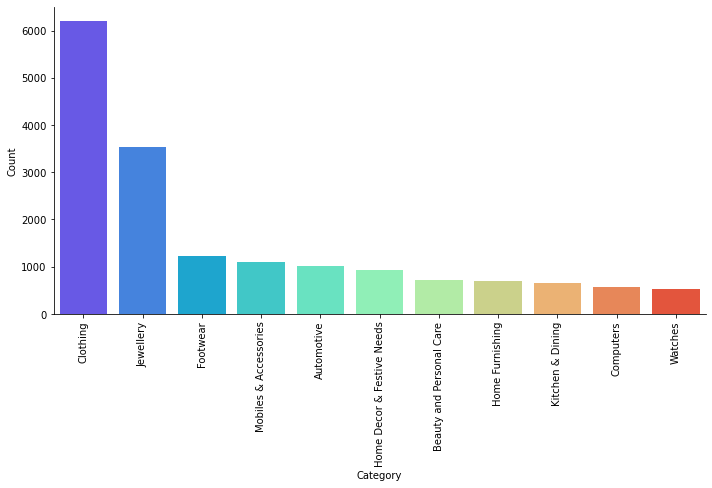

In [147]:
sns.catplot("Category", "Count", data=top_500_category, kind='bar',aspect=2,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

#### Unrequired Data

For Now, Let's look at the ineffectual data and see if we can make something useful out of it.

In [148]:
#Let's see if its even feasible to visualize the categories with least counts
bottom_categories=count_of_category(500,bottom=True,List=True)

In [149]:
print("The number of categories with count less then 500 :",len(bottom_categories))

The number of categories with count less then 500 : 255


*As, we can see we still have **376** rows i.e Unique Categories, it would not be possible to visualize , let's switch to old fashion way, manually.*

In [150]:
bottom_categories

[('Baby Care', 483),
 ('Tools & Hardware', 391),
 ('Toys & School Supplies', 330),
 ('Pens & Stationery', 313),
 ('Bags, Wallets & Belts', 265),
 ('Furniture', 180),
 ('Sports & Fitness', 166),
 ('Cameras & Accessories', 82),
 ('Home Improvement', 81),
 ('Health & Personal Care Appliances', 43),
 ('Sunglasses', 40),
 ('Gaming', 35),
 ('Pet Supplies', 30),
 ('Home & Kitchen', 24),
 ('Home Entertainment', 19),
 ('eBooks', 15),
 ('Eyewear', 10),
 ("Clovia Women's Full Coverage Bra", 9),
 ("Vishudh Printed Women's Straight Kurta", 8),
 ("Lilliput Top Baby Girl's  Combo", 8),
 ('Olvin Aviator Sunglasses', 7),
 ("Clovia Women's T-Shirt Bra", 6),
 ("MASARA Solid Women's Straight Kurta", 5),
 ('Dressberry Gold Synthetic  Clutch', 4),
 ('Pu-Good Women Flats', 4),
 ('FEET FLOW Women Flats', 4),
 ('Olvin Wayfarer Sunglasses', 4),
 ('Firangi Cotton, Polyester Free Floor Mat Firangi...', 4),
 ('Household Supplies', 4),
 ("Indistar Self Design Viscose Women's Stole", 3),
 ('Treppe Bellies', 3),
 ('F

### Observation 2 
**Manual Inspection Observation:** 

In this Inspection, I noticed that now the categories have product name instead of actual categories (in most cases). Further, the data shows the same trend, large number of clothing and footwear items etc, meaning that even the un-required data speaks the proportion of the orignal and correct one.

Since they are unique it would not be possible to clean this data and extract the Primary and Correct category from it.

This means, only thing now left is to remove the unrequired data and move forward to the Machine Learning Part.

### Cleaning product_category_tree

Further Cleaning and setting up the data for Predictions.

In [151]:
#making a new column "primary_category"  
flipkart_data["primary_category"]=primary_category
flipkart_data.head()

,product_name,product_category_tree,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies


In [152]:
#Now there is no need for product_category_tree , so we drop it.
flipkart_data.drop(flipkart_data.columns[[1]], axis=1, inplace=True)
#removing the 2 null values in 'description' column
flipkart_data=flipkart_data.dropna(subset=['description'])

In [153]:
#checking the remaning null values in description
flipkart_data[flipkart_data['description'].isnull()]

,product_name,description,brand,primary_category


In [154]:
#checking the remaning null values in the data.
flipkart_data[flipkart_data.isnull().any(axis=1)]

,product_name,description,brand,primary_category
25,Glus Wedding Lingerie Set,Glus Wedding Lingerie Set - Buy Turquoise Glus...,NaN,Clothing
26,Veelys Shiny White Quad Roller Skates - Size 4...,Veelys Shiny White Quad Roller Skates - Size 4...,NaN,Sports & Fitness
27,Bulaky vanity case Jewellery Vanity Case,Buy Bulaky vanity case Jewellery Vanity Case f...,NaN,Beauty and Personal Care
28,FDT Women's Leggings,FDT Women's Leggings - Buy Parrot Green FDT Wo...,NaN,Clothing
29,Madcaps C38GR30 Men's Cargos,Madcaps C38GR30 Men's Cargos - Buy Green Madca...,NaN,Clothing
...,...,...,...,...
19936,Purple Women Heels,Flipkart.com: Buy Purple Women Heels only for ...,NaN,Footwear
19941,Pinq Chiq Women Heels,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN,Footwear
19953,La Isla Women Heels,Flipkart.com: Buy La Isla Women Heels only for...,NaN,Footwear
19958,We Witches Comfy Hues Women Wedges,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN,Footwear


### Categories to use.

When we looked at the plot createad using top_500_category , We observed that the data was inbalanced,So our Machine Learning Model will give better accuracy and result if we use categories with large data only. For starters let's only take Top 10 Categories.

In [155]:
top_500_category = top_500_category['Category'][0:10]
top_10_categories = list(top_500_category)
top_10_categories

['Clothing',
 'Jewellery',
 'Footwear',
 'Mobiles & Accessories',
 'Automotive',
 'Home Decor & Festive Needs',
 'Beauty and Personal Care',
 'Home Furnishing',
 'Kitchen & Dining',
 'Computers']

In [156]:
flipkart_data

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign,Baby Care
19996,Wallmantra Large Vinyl Stickers Sticker,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,Baby Care
19997,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care
19998,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care


**Now, We will adjust our flipkart_data to only have these Top 10 categories**

In [157]:
# using 'isin' we filtered our flipkart data to have only top 10 categories
flipkart_data= flipkart_data[flipkart_data['primary_category'].isin(top_10_categories)][['product_name','description','brand','primary_category']]

In [158]:
flipkart_data

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
6,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,Footwear
...,...,...,...,...
19936,Purple Women Heels,Flipkart.com: Buy Purple Women Heels only for ...,NaN,Footwear
19941,Pinq Chiq Women Heels,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN,Footwear
19953,La Isla Women Heels,Flipkart.com: Buy La Isla Women Heels only for...,NaN,Footwear
19958,We Witches Comfy Hues Women Wedges,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN,Footwear


In [159]:
# Verification
flipkart_data.describe()


,product_name,description,brand,primary_category
count,16629,16629,11832,16629
unique,10217,14455,2755,10
top,TheLostPuppy Back Cover for Apple iPad Air,TheLostPuppy Back Cover for Apple iPad Air (Mu...,Allure Auto,Clothing
freq,134,92,469,6197


#### Attempt to Increase Accuracy
Now, we can merge the product_name, description and brand column to create a single feature. This is an attempt to increase the accuracy of the model, using more than just the description.

In [160]:
#let's make a copy of orginal data 
flipkart_data_merged=flipkart_data.copy()
flipkart_data_merged

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
6,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,Footwear
...,...,...,...,...
19936,Purple Women Heels,Flipkart.com: Buy Purple Women Heels only for ...,NaN,Footwear
19941,Pinq Chiq Women Heels,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN,Footwear
19953,La Isla Women Heels,Flipkart.com: Buy La Isla Women Heels only for...,NaN,Footwear
19958,We Witches Comfy Hues Women Wedges,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN,Footwear


In [161]:
#Merging the columns using string property
flipkart_data_merged['text']= flipkart_data_merged['brand'].astype(str) +" "+ flipkart_data_merged['product_name'].astype(str) + " " + flipkart_data_merged['description'].astype(str)

#created a new single feature 'text'

In [162]:
#Dropping unrequired Columns
flipkart_data_merged.drop(flipkart_data_merged.columns[[0,1,2]], axis=1, inplace=True)

In [163]:
flipkart_data_merged

,primary_category,text
0,Clothing,Alisha Alisha Solid Women's Cycling Shorts Key...
2,Footwear,AW AW Bellies Key Features of AW Bellies Sanda...
3,Clothing,Alisha Alisha Solid Women's Cycling Shorts Key...
6,Clothing,Alisha Alisha Solid Women's Cycling Shorts Key...
8,Footwear,"dilli bazaaar dilli bazaaar Bellies, Corporate..."
...,...,...
19936,Footwear,nan Purple Women Heels Flipkart.com: Buy Purpl...
19941,Footwear,nan Pinq Chiq Women Heels Flipkart.com: Buy Pi...
19953,Footwear,nan La Isla Women Heels Flipkart.com: Buy La I...
19958,Footwear,nan We Witches Comfy Hues Women Wedges Flipkar...


In [164]:
# reindex the 'text' column in front
flipkart_data_merged=flipkart_data_merged.reindex(['text','primary_category'],axis="columns")
flipkart_data_merged

,text,primary_category
0,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
2,AW AW Bellies Key Features of AW Bellies Sanda...,Footwear
3,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
6,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
8,"dilli bazaaar dilli bazaaar Bellies, Corporate...",Footwear
...,...,...
19936,nan Purple Women Heels Flipkart.com: Buy Purpl...,Footwear
19941,nan Pinq Chiq Women Heels Flipkart.com: Buy Pi...,Footwear
19953,nan La Isla Women Heels Flipkart.com: Buy La I...,Footwear
19958,nan We Witches Comfy Hues Women Wedges Flipkar...,Footwear


In [165]:
# Let's use only "description" column to predict the categories 
flipkart_data.drop(flipkart_data.columns[[0,2]], axis=1, inplace=True)

In [166]:
flipkart_data

,description,primary_category
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
6,Key Features of Alisha Solid Women's Cycling S...,Clothing
8,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear
...,...,...
19936,Flipkart.com: Buy Purple Women Heels only for ...,Footwear
19941,Flipkart.com: Buy Pinq Chiq Women Heels only f...,Footwear
19953,Flipkart.com: Buy La Isla Women Heels only for...,Footwear
19958,Flipkart.com: Buy We Witches Comfy Hues Women ...,Footwear


#### Conclusion
Now, we have two data, one with features megered into single column text

In [167]:
flipkart_data_merged

,text,primary_category
0,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
2,AW AW Bellies Key Features of AW Bellies Sanda...,Footwear
3,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
6,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
8,"dilli bazaaar dilli bazaaar Bellies, Corporate...",Footwear
...,...,...
19936,nan Purple Women Heels Flipkart.com: Buy Purpl...,Footwear
19941,nan Pinq Chiq Women Heels Flipkart.com: Buy Pi...,Footwear
19953,nan La Isla Women Heels Flipkart.com: Buy La I...,Footwear
19958,nan We Witches Comfy Hues Women Wedges Flipkar...,Footwear


and other

In [168]:
flipkart_data

,description,primary_category
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
6,Key Features of Alisha Solid Women's Cycling S...,Clothing
8,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear
...,...,...
19936,Flipkart.com: Buy Purple Women Heels only for ...,Footwear
19941,Flipkart.com: Buy Pinq Chiq Women Heels only f...,Footwear
19953,Flipkart.com: Buy La Isla Women Heels only for...,Footwear
19958,Flipkart.com: Buy We Witches Comfy Hues Women ...,Footwear


*With just description column, we will now check which data performs better*

**(Initial assumption : flipkart_data_merged** will tend to perform better as Brand and product name is essential to define its category).

**Things to keep in mind :**
flipkart_data_merged has word 'nan' due to empty brand columns. We can take care of that and other words like "Buy","Key Features" etc in stopwords.    

flipkart_data on the other hand has only "description" as a feature.

### Preprocessing texts for Machine Learning Models

In [169]:
!pip3 install nltk

In [170]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string # for removing punctuations in string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [171]:
# adding custom stopwords 
# custom stopwords are selected from manual inspection
new_stopwords = ["buy", "features", "key", "specifications","nan","NaN"]

#extending the stopwords with custom stopwords
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

In [172]:
# This class preprocesses the text for us using tokenizer and stopwords.
# it also removes punctuations if there are any.
class PreProcessText(object):
    def __init__(self):
        pass
    
    def __remove_punctuation(self, text):
        """
        Takes a String 
        return : Return a String 
        """
        message = []
        for x in text:
            #Using String Library
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            #our custom stpwrd
            if x.lower() in stpwrd:
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words

### Using Flipkart Data 

Here we have generated 2 different data **flipkart_data** and **flipkart_data_merged** after preprocessing the original data.Now we will use the **flipkart_data_merged** with brand, product_name and description merged into "text".

In [173]:
flipkart_data_merged

,text,primary_category
0,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
2,AW AW Bellies Key Features of AW Bellies Sanda...,Footwear
3,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
6,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
8,"dilli bazaaar dilli bazaaar Bellies, Corporate...",Footwear
...,...,...
19936,nan Purple Women Heels Flipkart.com: Buy Purpl...,Footwear
19941,nan Pinq Chiq Women Heels Flipkart.com: Buy Pi...,Footwear
19953,nan La Isla Women Heels Flipkart.com: Buy La I...,Footwear
19958,nan We Witches Comfy Hues Women Wedges Flipkar...,Footwear


In [174]:
obj = PreProcessText()
flipkart_data_merged["text"]=flipkart_data_merged["text"].apply(obj.token_words)

In [175]:
flipkart_data_merged['text']

0        [Alisha, Alisha, Solid, Womens, Cycling, Short...
2        [AW, AW, Bellies, AW, Bellies, Sandals, Wedges...
3        [Alisha, Alisha, Solid, Womens, Cycling, Short...
6        [Alisha, Alisha, Solid, Womens, Cycling, Short...
8        [dilli, bazaaar, dilli, bazaaar, Bellies, Corp...
                               ...                        
19936    [Purple, Women, Heels, Flipkartcom, Purple, Wo...
19941    [Pinq, Chiq, Women, Heels, Flipkartcom, Pinq, ...
19953    [La, Isla, Women, Heels, Flipkartcom, La, Isla...
19958    [Witches, Comfy, Hues, Women, Wedges, Flipkart...
19962    [Stylistry, Women, Heels, Flipkartcom, Stylist...
Name: text, Length: 16629, dtype: object

### Implementing Machine Learning 

##### Here, implementation of machine learning models, (Naive Bayes and KNN), on the whole dataset is not included in the objective of lab assignment. But I have implemented it for practise.

In [176]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Splitting the data into 60%(Train dataset) and 40% (Test dataset)

In [177]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(flipkart_data_merged["text"],
                                                    flipkart_data_merged["primary_category"],
                                                    test_size=0.4, random_state = 50)

In [178]:
X_train=X_train.apply(lambda x: ' '.join(x))
X_test=X_test.apply(lambda x: ' '.join(x))

In [179]:
X_train

15780    Knotty Derby James Ankle Sneakers Knotty Derby...
4264     Allure Auto Allure Auto CM 356 Car Mat Maruti ...
13935    Nimya Solid Mens Polo Neck TShirt Nimya Solid ...
12203    Regular Tokyo Talkies Womens Printed Casual Sh...
15271    R18JewelsFashionU R18JewelsFashionU Princess G...
                               ...                        
17265    Mast Harbour Mast Harbour Gold Enamel Cuff Mas...
18563    overstockedkitchen overstockedkitchen NonStick...
12307    Regular Bedazzle Womens Animal Print Casual Sh...
6219     JDX JDX Alloy Necklace JDX Alloy Necklace JDX ...
16694    Slim Invictus Mens Solid Formal Shirt Invictus...
Name: text, Length: 9977, dtype: object

In [180]:
y_train

15780            Footwear
4264           Automotive
13935            Clothing
12203            Clothing
15271           Jewellery
               ...       
17265           Jewellery
18563    Kitchen & Dining
12307            Clothing
6219            Jewellery
16694            Clothing
Name: primary_category, Length: 9977, dtype: object

In [181]:
#renaming test and train data to avoid ambiguity in code
train_X = X_train
train_y = y_train
test_X = X_test
test_y = y_test

### Implementing Multinomial Naive Bayes

In [232]:
# we will use pipeline to make our model of TfidfVectorizer and MultinomialNB

model=make_pipeline(TfidfVectorizer(),MultinomialNB())

#Training our model
model.fit(train_X,train_y)
prediction_tfid_mnb =model.predict(test_X)


print("\nAccuracy Score for flipkart_data_merged using Tfid and Naive Bayes: ",accuracy_score(y_test,prediction_tfid_mnb)) # Expected higher result than flipkart_data

print("\n\n-----------------------Classification report-----------------------\n",classification_report(prediction_tfid_mnb,test_y))

print("\n\n------------------Confusion Matrix------------------\n")
print(confusion_matrix(prediction_tfid_mnb,test_y))

r_mnb = recall_score(prediction_tfid_mnb, test_y,average='micro')
print("\n\nRecall score is: ",r_mnb)




Accuracy Score for flipkart_data_merged using Tfid and Naive Bayes:  0.936259771497294


-----------------------Classification report-----------------------
                             precision    recall  f1-score   support

                Automotive       0.95      0.98      0.96       401
  Beauty and Personal Care       0.65      1.00      0.79       179
                  Clothing       1.00      0.93      0.96      2621
                 Computers       0.68      1.00      0.81       174
                  Footwear       0.90      1.00      0.95       436
Home Decor & Festive Needs       0.92      0.99      0.95       332
           Home Furnishing       0.78      0.99      0.87       210
                 Jewellery       1.00      0.88      0.94      1654
          Kitchen & Dining       0.71      1.00      0.83       183
     Mobiles & Accessories       0.97      0.95      0.96       462

                  accuracy                           0.94      6652
                 macro 

### Implementing K-Nearest Neighbors

In [230]:
# we will use pipeline to make our model of TfidfVectorizer and KNeighborsClassifier
model_=make_pipeline(TfidfVectorizer(),KNeighborsClassifier())

#Training our model
model_.fit(train_X,train_y)
prediction_tfid_knn=model_.predict(test_X)

print("\nAccuracy Score for flipkart_data_merged using Tfid  and KNN : ",accuracy_score(y_test,prediction_tfid_knn)) 
print("\n\n-----------------------Classification report-----------------------\n",classification_report(prediction_tfid_knn,test_y))

print("\n\n------------------Confusion Matrix------------------\n")
print(confusion_matrix(prediction_tfid_knn,test_y))

r_knn = recall_score(prediction_tfid_knn, test_y,average='micro')  
print("\n\nRecall Score is: ",r_knn)


Accuracy Score for flipkart_data_merged using Tfid  and KNN :  0.9792543595911004


-----------------------Classification report-----------------------
                             precision    recall  f1-score   support

                Automotive       0.99      0.98      0.98       413
  Beauty and Personal Care       0.93      0.96      0.94       267
                  Clothing       1.00      0.99      0.99      2459
                 Computers       0.94      0.97      0.95       249
                  Footwear       0.96      0.98      0.97       474
Home Decor & Festive Needs       0.96      0.97      0.96       357
           Home Furnishing       0.98      0.96      0.97       271
                 Jewellery       0.99      0.98      0.98      1469
          Kitchen & Dining       0.92      0.99      0.95       240
     Mobiles & Accessories       0.98      0.98      0.98       453

                  accuracy                           0.98      6652
                 macro avg  

#### Observation:
From the above implementation we can observe that the accuracy of KNN is more than the accuracy of Multinomial Naive Bayes

* **Accuracy of Naive Bayes: 94%**
* **Accuracy of K-Nearest Neighbor: 98%**

### Implementing K-Fold Cross Validator on 60% split data

In [184]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [185]:
# Lets split the data into 5 folds.  
# Using the 'kf'(KFold splitting stratergy) object as input to cross_val_score() method

from sklearn.model_selection import train_test_split

kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 7981, Test set:1996
Fold:2, Train set: 7981, Test set:1996
Fold:3, Train set: 7982, Test set:1995
Fold:4, Train set: 7982, Test set:1995
Fold:5, Train set: 7982, Test set:1995


In [186]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#create a new KNN model
#Using pipeline to make our model of TfidfVectorizer and KNeighborsClassifier
model=make_pipeline(TfidfVectorizer(),KNeighborsClassifier(n_neighbors =8))


#train model with cv of 5 
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

#print each cv score (accuracy) and average them
print(cv_scores)
print("\n\ncv_scores mean:{}".format(np.mean(cv_scores)))


[0.98146293 0.97745491 0.96691729 0.97092732 0.97343358]


cv_scores mean:0.9740392062320128


In [187]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(model, X_train, y_train, cv=kf)
conf_mat = confusion_matrix(y_train, y_pred)


print("\n\n-----------------------Classification report-----------------------\n",classification_report(y_pred,y_train))
print("\n\n------------------Confusion Matrix------------------\n",conf_mat)
r_ = recall_score(y_pred, y_train,average='micro')
print("\n\nRecall Score is : ",r_)




-----------------------Classification report-----------------------
                             precision    recall  f1-score   support

                Automotive       0.97      0.97      0.97       600
  Beauty and Personal Care       0.93      0.96      0.94       419
                  Clothing       1.00      0.98      0.99      3823
                 Computers       0.88      0.95      0.91       300
                  Footwear       0.96      0.97      0.96       735
Home Decor & Festive Needs       0.93      0.97      0.95       541
           Home Furnishing       0.96      0.97      0.97       429
                 Jewellery       0.99      0.97      0.98      2103
          Kitchen & Dining       0.91      0.97      0.94       363
     Mobiles & Accessories       0.98      0.95      0.96       664

                  accuracy                           0.97      9977
                 macro avg       0.95      0.97      0.96      9977
              weighted avg       0.97      

The accuracy after implementing k-fold cross validator on the **trained 60%** data is **97%**

Here we will compare the performance of k-fold cross validator with the models that will be created by splitting the trained 60% data into 5 parts.

### Generating Models by dividing the data into 5 parts and then splitting it into 70-30 

### Model 1

In [188]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train,y1_test = train_test_split(X_train,y_train, test_size=0.3, random_state=42)

In [189]:
from sklearn.neighbors import KNeighborsClassifier
  
# we will use pipeline to make our model of TfidfVectorizer and KNeighborsClassifier
model1=make_pipeline(TfidfVectorizer(),KNeighborsClassifier(n_neighbors =20))

#Training our model
model1.fit(X1_train,y1_train)
prediction_tfid1=model1.predict(X1_test)

In [190]:
acc1 = accuracy_score(y1_test,prediction_tfid1)
print("Accuracy Score for Model 1: ",acc1)

Accuracy Score for Model 1:  0.9676018704074816


In [191]:
print(classification_report(prediction_tfid1,y1_test))

print("Confusion Matrix:")
print(confusion_matrix(prediction_tfid1,y1_test))

                            precision    recall  f1-score   support

                Automotive       0.97      0.97      0.97       153
  Beauty and Personal Care       0.93      0.94      0.94       134
                  Clothing       1.00      0.98      0.99      1163
                 Computers       0.88      0.89      0.88        87
                  Footwear       0.97      0.98      0.98       236
Home Decor & Festive Needs       0.82      0.99      0.89       158
           Home Furnishing       0.91      0.92      0.91       116
                 Jewellery       1.00      0.96      0.98       650
          Kitchen & Dining       0.88      0.98      0.93       107
     Mobiles & Accessories       0.98      0.95      0.97       190

                  accuracy                           0.97      2994
                 macro avg       0.93      0.96      0.94      2994
              weighted avg       0.97      0.97      0.97      2994

Confusion Matrix:
[[ 149    0    0    0    0 

#### Calculating micro recall as 'micro' calculate metrics globally by counting the total true positives, false negatives and false positives.

In [192]:
r1 = recall_score(prediction_tfid1, y1_test,average='micro')
print(r1)

0.9676018704074816


### Model 2

In [193]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train,y2_test = train_test_split(X_train,y_train, test_size=0.3, random_state=60)

In [194]:
# we will use pipeline to make our model of TfidfVectorizer and KNeighborsClassifier
model2=make_pipeline(TfidfVectorizer(),KNeighborsClassifier(n_neighbors = 50))

#Training our model
model2.fit(X2_train,y2_train)
prediction_tfid2=model2.predict(X2_test)

In [195]:
acc2 = accuracy_score(y2_test,prediction_tfid2)
print("Accuracy Score for Model 2:", acc2)

Accuracy Score for Model 2: 0.9512358049432198


In [196]:
print(classification_report(prediction_tfid2,y2_test))

print("Confusion Matrix:")
print(confusion_matrix(prediction_tfid2,y2_test))

                            precision    recall  f1-score   support

                Automotive       0.93      0.98      0.95       171
  Beauty and Personal Care       0.83      0.86      0.84       110
                  Clothing       0.99      0.98      0.99      1193
                 Computers       0.73      0.83      0.77        93
                  Footwear       0.99      0.89      0.94       228
Home Decor & Festive Needs       0.88      0.97      0.92       154
           Home Furnishing       0.89      0.99      0.94       115
                 Jewellery       1.00      0.94      0.97       648
          Kitchen & Dining       0.85      0.98      0.91        98
     Mobiles & Accessories       0.90      0.91      0.91       184

                  accuracy                           0.95      2994
                 macro avg       0.90      0.93      0.91      2994
              weighted avg       0.95      0.95      0.95      2994

Confusion Matrix:
[[ 168    0    0    0    0 

In [197]:
r2 = recall_score(prediction_tfid2, y2_test,average='micro')
print(r2)

0.9512358049432198


### Model 3

In [198]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train,y3_test = train_test_split(X_train,y_train, test_size=0.3, random_state=80)

In [199]:
# we will use pipeline to make our model of TfidfVectorizer and KNeighborsClassifier
model3=make_pipeline(TfidfVectorizer(),KNeighborsClassifier(n_neighbors = 25))

#Training our model
model3.fit(X3_train,y3_train)
prediction_tfid3=model3.predict(X3_test)

In [200]:
acc3 = accuracy_score(y3_test,prediction_tfid3)
print("Accuracy Score for Model 3: ",acc3)

Accuracy Score for Model 3:  0.9629258517034068


In [201]:
print(classification_report(prediction_tfid3,y3_test))

print("Confusion Matrix:")
print(confusion_matrix(prediction_tfid3,y3_test))

                            precision    recall  f1-score   support

                Automotive       0.97      0.98      0.97       171
  Beauty and Personal Care       0.87      0.98      0.92       118
                  Clothing       1.00      0.98      0.99      1164
                 Computers       0.83      0.87      0.85        87
                  Footwear       0.97      0.97      0.97       231
Home Decor & Festive Needs       0.85      0.97      0.91       147
           Home Furnishing       0.92      0.94      0.93       128
                 Jewellery       1.00      0.95      0.97       637
          Kitchen & Dining       0.82      0.97      0.89        96
     Mobiles & Accessories       0.97      0.94      0.96       215

                  accuracy                           0.96      2994
                 macro avg       0.92      0.95      0.94      2994
              weighted avg       0.97      0.96      0.96      2994

Confusion Matrix:
[[ 167    1    0    0    0 

In [202]:
r3 = recall_score(prediction_tfid3, y3_test,average='micro')
print(r3)

0.9629258517034068


### Model 4

In [203]:
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train,y4_test = train_test_split(X_train,y_train, test_size=0.3, random_state=40)

In [204]:
# we will use pipeline to make our model of TfidfVectorizer and KNeighborsClassifier
model4=make_pipeline(TfidfVectorizer(),KNeighborsClassifier(n_neighbors = 8))

#Training our model
model4.fit(X4_train,y4_train)
prediction_tfid4=model4.predict(X4_test)

In [205]:
acc4 = accuracy_score(y4_test,prediction_tfid4)
print("Accuracy Score for Model 4:",acc4)

Accuracy Score for Model 4: 0.9732798931195725


In [206]:
print(classification_report(prediction_tfid1,y1_test))

print("Confusion Matrix:")
print(confusion_matrix(prediction_tfid4,y4_test))

                            precision    recall  f1-score   support

                Automotive       0.97      0.97      0.97       153
  Beauty and Personal Care       0.93      0.94      0.94       134
                  Clothing       1.00      0.98      0.99      1163
                 Computers       0.88      0.89      0.88        87
                  Footwear       0.97      0.98      0.98       236
Home Decor & Festive Needs       0.82      0.99      0.89       158
           Home Furnishing       0.91      0.92      0.91       116
                 Jewellery       1.00      0.96      0.98       650
          Kitchen & Dining       0.88      0.98      0.93       107
     Mobiles & Accessories       0.98      0.95      0.97       190

                  accuracy                           0.97      2994
                 macro avg       0.93      0.96      0.94      2994
              weighted avg       0.97      0.97      0.97      2994

Confusion Matrix:
[[ 182    1    0    0    1 

In [207]:
r4 = recall_score(prediction_tfid4, y4_test,average='micro')
print(r4)

0.9732798931195725


### Model 5

In [208]:
from sklearn.model_selection import train_test_split
X5_train, X5_test, y5_train,y5_test = train_test_split(X_train,y_train, test_size=0.3, random_state=100)

In [209]:
# we will use pipeline to make our model of TfidfVectorizer and KNeighborsClassifier
model5=make_pipeline(TfidfVectorizer(),KNeighborsClassifier(n_neighbors = 10))

#Training our model
model5.fit(X5_train,y5_train)
prediction_tfid5=model5.predict(X5_test)

In [210]:
acc5=accuracy_score(y5_test,prediction_tfid5)
print("Accuracy Score for Model 5: ",acc5)

Accuracy Score for Model 5:  0.9676018704074816


In [211]:
print(classification_report(prediction_tfid1,y1_test))

print("Confusion Matrix:")
print(confusion_matrix(prediction_tfid5,y5_test))

                            precision    recall  f1-score   support

                Automotive       0.97      0.97      0.97       153
  Beauty and Personal Care       0.93      0.94      0.94       134
                  Clothing       1.00      0.98      0.99      1163
                 Computers       0.88      0.89      0.88        87
                  Footwear       0.97      0.98      0.98       236
Home Decor & Festive Needs       0.82      0.99      0.89       158
           Home Furnishing       0.91      0.92      0.91       116
                 Jewellery       1.00      0.96      0.98       650
          Kitchen & Dining       0.88      0.98      0.93       107
     Mobiles & Accessories       0.98      0.95      0.97       190

                  accuracy                           0.97      2994
                 macro avg       0.93      0.96      0.94      2994
              weighted avg       0.97      0.97      0.97      2994

Confusion Matrix:
[[ 169    0    0    0    0 

In [212]:
r5 = recall_score(prediction_tfid5, y5_test,average='micro')
print(r5)

0.9676018704074816


### Ensemble Model

#### Voting Classifier:
A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting.The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

Voting Classifier supports two types of votings-

* **Hard Voting:** In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers
* **Soft Voting:**  In soft voting, the output class is the prediction based on the average of probability given to that class.

In [213]:
# import the voting classifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

# import the voting regressor
from sklearn.ensemble import VotingRegressor
new_clf = make_pipeline(TfidfVectorizer(),KNeighborsClassifier())

### Firstly implementing Hard Voting

In [214]:
#defining and initiating hard voting classifier
voting_clf_hard = VotingClassifier(
    estimators = [('model1',new_clf),
                  ('model2',new_clf),
                  ('model3',new_clf),
                  ('model4',new_clf),
                  ('model5',new_clf)], 
    voting='hard')

In [215]:
voting_clf_hard.fit(X_train,y_train)
y_pred_hard = voting_clf_hard.predict(X_test)

In [216]:
acc_en_hard = accuracy_score(y_pred_hard,y_test)
print(acc_en_hard)

0.9792543595911004


In [217]:
#calculating Classification report and confusion matrix
print(classification_report(y_pred_hard,y_test))

print("Confusion Matrix:")
print(confusion_matrix(y_pred_hard,y_test))

                            precision    recall  f1-score   support

                Automotive       0.99      0.98      0.98       413
  Beauty and Personal Care       0.93      0.96      0.94       267
                  Clothing       1.00      0.99      0.99      2459
                 Computers       0.94      0.97      0.95       249
                  Footwear       0.96      0.98      0.97       474
Home Decor & Festive Needs       0.96      0.97      0.96       357
           Home Furnishing       0.98      0.96      0.97       271
                 Jewellery       0.99      0.98      0.98      1469
          Kitchen & Dining       0.92      0.99      0.95       240
     Mobiles & Accessories       0.98      0.98      0.98       453

                  accuracy                           0.98      6652
                 macro avg       0.96      0.97      0.97      6652
              weighted avg       0.98      0.98      0.98      6652

Confusion Matrix:
[[ 404    1    1    0    0 

In [218]:
#Calculating the recall score of soft voting
r_en_hard = recall_score(y_pred_hard, y_test,average='micro')
print(r_en_hard)

0.9792543595911004


### Soft Voting

In [219]:
#defining and initiating soft voting classifier
voting_clf_soft = VotingClassifier(
    estimators = [('model1',new_clf),
                  ('model2',new_clf),
                  ('model3',new_clf),
                  ('model4',new_clf),
                  ('model5',new_clf)], 
    voting='soft')

In [220]:
voting_clf_soft.fit(X_train,y_train)
y_pred_soft= voting_clf_soft.predict(X_test)

In [221]:
acc_en_soft = accuracy_score(y_pred_soft,y_test)
print(acc_en_soft)

0.9792543595911004


In [222]:
#calculating Classification report and confusion matrix
print(classification_report(y_pred_soft,y_test))

print("Confusion Matrix:")
print(confusion_matrix(y_pred_soft,y_test))

                            precision    recall  f1-score   support

                Automotive       0.99      0.98      0.98       413
  Beauty and Personal Care       0.93      0.96      0.94       267
                  Clothing       1.00      0.99      0.99      2459
                 Computers       0.94      0.97      0.95       249
                  Footwear       0.96      0.98      0.97       474
Home Decor & Festive Needs       0.96      0.97      0.96       357
           Home Furnishing       0.98      0.96      0.97       271
                 Jewellery       0.99      0.98      0.98      1469
          Kitchen & Dining       0.92      0.99      0.95       240
     Mobiles & Accessories       0.98      0.98      0.98       453

                  accuracy                           0.98      6652
                 macro avg       0.96      0.97      0.97      6652
              weighted avg       0.98      0.98      0.98      6652

Confusion Matrix:
[[ 404    1    1    0    0 

In [223]:
#Calculating the recall score of soft voting
r_en_soft = recall_score(y_pred_soft, y_test,average='micro')
print(r_en_soft)

0.9792543595911004


#### Observation 

From the above observation we can see that the accuracy of Hard Voting and Soft Voting is same.

* **Accuracy of Hard Voting: 98%**
* **Accuracy of Soft Voting: 98%**

##### NOTE: Soft Voting often achieves higher performance than hard voting because it gives more weight to highly confident votes.

### Preparing a Comparision Table

In [224]:
!pip install PrettyTable

In [238]:
from prettytable import PrettyTable
print("\t\tCOMPARISION TABLE")

#defining headings of the column
analysis_table = PrettyTable(["Model", "Accuracy", "Recall"])

#adding rows to the table
analysis_table.add_row(["Multinomial Naive Bayes", round(accuracy_score(y_test,prediction_tfid_mnb),2), round(r_mnb,2)])
analysis_table.add_row(["K Nearest Neighbors ", round(accuracy_score(y_test,prediction_tfid_knn),2),round(r_knn,2)])
analysis_table.add_row(["K-fold cross validator", round(np.mean(cv_scores),2), round(r_,2)])

analysis_table.add_row(["Model 1", round(acc1,2), round(r1,2)])
analysis_table.add_row(["Model 2", round(acc2,2), round(r2,2)])
analysis_table.add_row(["Model 3", round(acc3,2), round(r3,2)])
analysis_table.add_row(["Model 4", round(acc4,2), round(r4,2)])
analysis_table.add_row(["Model 5", round(acc5,2), round(r5,2)])

analysis_table.add_row(["Ensemble Model(Hard)", round(acc_en_hard,2), round(r_en_hard,2)])
analysis_table.add_row(["Ensemble Model(Soft)", round(acc_en_soft,2), round(r_en_soft,2)])


    
print(analysis_table)

		COMPARISION TABLE
+-------------------------+----------+--------+
|          Model          | Accuracy | Recall |
+-------------------------+----------+--------+
| Multinomial Naive Bayes |   0.94   |  0.94  |
|   K Nearest Neighbors   |   0.98   |  0.98  |
|  K-fold cross validator |   0.97   |  0.97  |
|         Model 1         |   0.97   |  0.97  |
|         Model 2         |   0.95   |  0.95  |
|         Model 3         |   0.96   |  0.96  |
|         Model 4         |   0.97   |  0.97  |
|         Model 5         |   0.97   |  0.97  |
|   Ensemble Model(Hard)  |   0.98   |  0.98  |
|   Ensemble Model(Soft)  |   0.98   |  0.98  |
+-------------------------+----------+--------+


### Observation:

* *Comparing Multinomial Naive Bayes and K-Nearest Neighbor we can see that the accuracy and recall of the KNN (98%) is more than the accuracy of Multinomial Naive Bayes (94%)*
* *The accuracy generated by the K-Fold cross validator is 97% which is less than KNN and more than Naive Bayes. KFold Cross Validator is applied on the 60% trained part of the original dataset*
* *After developing the ensemble model we can see that the accuracy increased when compared to k-fold cross validator and Multinomial Naive Bayes models. While accuracy of KNN and Ensemble Model is same*
* *Also the accuracy of ensemble hard is equal to the accuracy of ensemble soft i.e. 98%*